In [34]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

%matplotlib inline

# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

### Carregando base de dados e instanciando o modelo de regressão


In [35]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

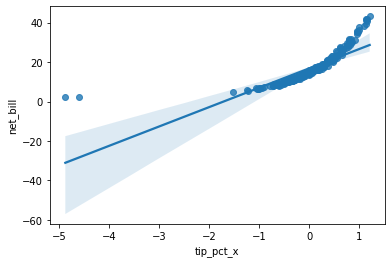

In [36]:
tips['tip_pct_x'] = np.log((tips['net_bill']-(tips['net_bill'].min()-.1))) + np.random.randn(244)*.05
tips['tip_pct_x'] = tips['tip_pct_x'] - tips['tip_pct_x'].mean()
sns.regplot(x = tips['tip_pct_x'], y = tips['net_bill'])

In [37]:
reg = smf.ols('tip_pct_x ~ net_bill', data=tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              tip_pct_x   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     514.4
Date:                Thu, 30 Sep 2021   Prob (F-statistic):           8.08e-62
Time:                        21:10:53   Log-Likelihood:                -111.07
No. Observations:                 244   AIC:                             226.1
Df Residuals:                     242   BIC:                             233.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1647      0.057    -20.466      0.000      -1.277      -1.053
net_bill       0.0694      0.003     22.680      0.000       0.063       0.075
==============================================================================
Omnibus:                      380.557   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55042.533
Skew:                          -7.751   Prob(JB):                         0.00
Kurtosis:                      74.928   Cond. No.                         43.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

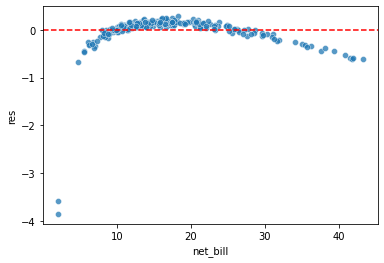

In [38]:
tips['res'] = reg.resid


sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [39]:
reg = smf.ols('tip_pct_x ~ np.log(net_bill)', data=tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              tip_pct_x   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     2213.
Date:                Thu, 30 Sep 2021   Prob (F-statistic):          9.58e-124
Time:                        21:10:53   Log-Likelihood:                 32.560
No. Observations:                 244   AIC:                            -61.12
Df Residuals:                     242   BIC:                            -54.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -3.6368      0.079    -46.328      0.000      -3.791      -3.482
np.log(net_bill)     1.3413      0.029     47.041      0.000       1.285       1.397
==============================================================================
Omnibus:                      386.932   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61921.160
Skew:                          -7.955   Prob(JB):                         0.00
Kurtosis:                      79.404   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

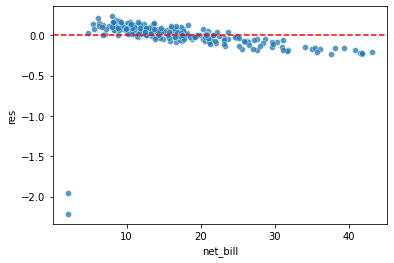

In [40]:
tips['res'] = reg.resid


sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [41]:
reg = smf.ols('tip_pct_x ~ np.power(net_bill,2)', data=tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              tip_pct_x   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     246.5
Date:                Thu, 30 Sep 2021   Prob (F-statistic):           8.84e-39
Time:                        21:10:54   Log-Likelihood:                -164.41
No. Observations:                 244   AIC:                             332.8
Df Residuals:                     242   BIC:                             339.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.4692      0.043    -10.986      0.000      -0.553      -0.385
np.power(net_bill, 2)     0.0014   8.64e-05     15.700      0.000       0.001       0.002
==============================================================================
Omnibus:                      332.519   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28831.303
Skew:                          -6.205   Prob(JB):                         0.00
Kurtosis:                      54.787   Cond. No.                         692.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

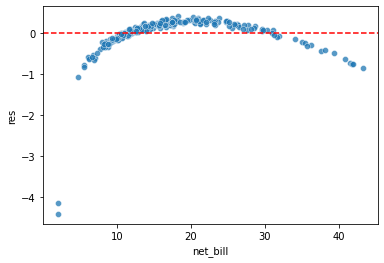

In [42]:
tips['res'] = reg.resid


sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [43]:
reg1 = smf.ols('np.log(tip_pct_x) ~ net_bill', data=tips).fit()
reg1.summary()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(tip_pct_x)   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     112.3
Date:                Thu, 30 Sep 2021   Prob (F-statistic):           4.87e-19
Time:                        21:10:54   Log-Likelihood:                -180.15
No. Observations:                 125   AIC:                             364.3
Df Residuals:                     123   BIC:                             369.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.3776      0.302    -14.485      0.000      -4.976      -3.779
net_bill       0.1356      0.013     10.597      0.000       0.110       0.161
==============================================================================
Omnibus:                      112.980   Durbin-Watson:                   2.335
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1152.407
Skew:                          -3.210   Prob(JB):                    5.73e-251
Kurtosis:                      16.418   Cond. No.                         77.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
tips['tip_pct_pred'] = reg1.fittedvalues
r = tips[['tip_pct_pred','tip_pct']].corr().iloc[0,1]
r**2

0.13140449660223644

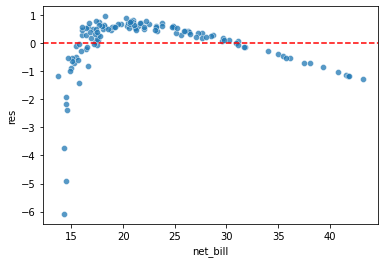

In [45]:
tips['res'] = reg1.resid


sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [46]:
reg = smf.ols('np.log(tip_pct) ~ np.log(net_bill)' , data=tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Thu, 30 Sep 2021   Prob (F-statistic):           5.20e-20
Time:                        21:11:29   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)    -0.4849      0.048    -10.026      0.000      -0.580      -0.390
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

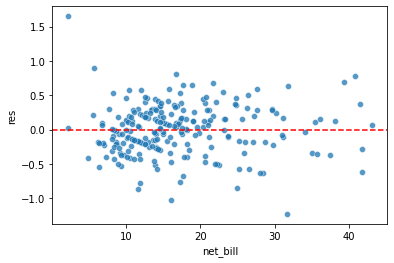

In [47]:
tips['res'] = reg.resid


sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

###  6. qual modelo resultou no melhor ajuste?

## O modelo no log do tip_pct em função do log de net_bill foi o melhor modelo com base na analise dos residuos.